# Multivariate Data Analysis - Assignment 2
#### Name: Kai Ferragallo-Hawkins
#### Date: 22.3.2023

# Exercise 3.1 - EFA for Global Development
**How many factors would be needed? How much variance would they explain?**

Answered in 3.1.2. (4 factors were used, ~72% variance).

**How does this particular question differ from the previous week?**

The number of factors vs variance remains about the same between this data and the *standardized* data in the PCA, though with differences due to a different way of handling NA values. The selection choice for this factor analysis depends much more on the relationship between the factors and the individual variables than PCA, which became much more of a mechanical summary due to the standardization.

**What else can you learn from the EFA results? Visualize the data using the factors and the factor scores.**

Answered through 3.1.3 and beyond. (Reduce the information to more explainable categories)

**Interpret your analysis and compare with your earlier analysis with PCA.**

Answered through 3.1.3 and beyond for interpretation. In comparison with earlier analysis of PCA, I found a similar division of components/factors that interact with income class and those that don't (50%). The factor analysis had a clearer distinction then the principal components, however. Outliers played a greater role in potentially messing with the data in this factor analysis.

**Reflect with (some of) the challenges and pitfalls listed in the lecture material.**

Subjectivity is a definite challenge - though factor analysis helps to reduce the data, it is us who decides how many factors to use and how to define them. My data here also broke with the assumption of normality that exists for EFA, so the inclusion of population, land size and gdp may do more harm than good to the information. However, I decided to keep them in this time instead of standardizing the information like for PCA to observe how that would affect the relationships.

In [357]:
# Pandas, package for general data analysis
import pandas as pd
# Factor_Analyzer, for factor analysis functions
from factor_analyzer import FactorAnalyzer
# Matplotlib, for base and adjustable python plotting
import matplotlib.pyplot as plt
# Seaborn, for more specific graphs
import seaborn as sns
# Numpy, for correlation and other mathematical functions
import numpy as np
# Netowrkx, for network relationship graphs
import networkx as nx

# Importing Global Development Data
global_development = pd.read_csv("data/worlddev.csv")

# Importing Airline Data (For Later)
airline = pd.read_csv("data/airline.csv")

# Importing DECA (For later)
DECA = pd.read_csv("data/DECA.csv")

## 3.1.1 - Exploring the data
In this exercise, I decided to do explore the data to understand where the NA values came from, rather than setting them to zero like in my PCA analysis. What I found was that there were four specific columns that were causing 29 countries to not have all their information - social_support, freedom, generosity, and cpi. I decided to remove the rows instead of those variables. When doing so, I found that dropping NA values no longer removed any of the available countries.

Following this, I created two new dataframes - one for the continuous/numerical variables, and another for the string variables. This is because factor analysis will not work for categorical information.

I also tried out normalizing the data, on the chance that the different scales would mess up the analysis. However, the oblique rotation did not appear to be affected by it. 

In [358]:
### NA Adjustments
# Dropping all rows with NA values
gd_no_na = global_development.dropna()

# Noting the differences in NA values
print("Differences in NA values for original dataframe:")
print("Number of rows in original DataFrame:", global_development.shape[0])
print("Number of rows after dropping NA values:", gd_no_na.shape[0])

# Displaying only the rows with NA values to determine what is causing the NA values
gd_with_na = global_development[global_development.isna().any(axis=1)]
print("\nRows with NA values:")
display(gd_with_na)

# Dropping social_support, freedom, generosity, and cpi columns from global_development, and preforming NA dropping again
gd_adj = global_development.drop(["social_support", "freedom", "generosity", "cpi"], axis=1)
gd_adj_no_na = gd_adj.dropna()

# Noting the new differences in NA values
print("Differences in NA values after dropping social_support, freedom, generosity, and cpi:")
print("Number of rows in original DataFrame:", gd_adj.shape[0])
print("Number of rows after dropping NA values:", gd_adj_no_na.shape[0])

### Changing to continuous
# Adjusting the dataset so that it only has continuous values. Grabs all the indexes that match the selected dtypes from the original dataframe.
gd_continuous = gd_adj_no_na[gd_adj_no_na.select_dtypes(include=["float64", "int64"]).columns].dropna()
gd_string = gd_adj_no_na[gd_adj_no_na.select_dtypes(include=["object"]).columns]

### Found to be unnecessary. Kept for legacies sake.
# ## Normalizing the continuous values.
# normalized_df = (gd_continuous - gd_continuous.mean()) / gd_continuous.std()
# 
# # printing standardized data
# print("\nStandardized Global Development Data:")
# display(normalized_df)

Differences in NA values for original dataframe:
Number of rows in original DataFrame: 186
Number of rows after dropping NA values: 157

Rows with NA values:


,country,electricity_access,gdp,gdp_capita,labor_rate,labor_force,land_area,life_expectancy,adult_literacy,water_access,...,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi,continent
9,"Bahamas, The",100.00,1.208270e+10,30398.36,73.56,2.270955e+05,10010.0,73.52,93.43,98.89,...,39.70,397399.75,4.3611,11.125,NaN,NaN,NaN,High income,65.33,North America
12,Barbados,100.00,4.909094e+09,17600.51,64.34,1.465618e+05,430.0,76.87,93.43,98.49,...,648.61,278901.75,9.1816,8.748,NaN,NaN,NaN,High income,65.67,North America
15,Belize,92.73,2.267500e+09,6112.84,64.53,1.656355e+05,22810.0,73.46,95.58,97.79,...,16.26,370985.75,6.3419,7.249,NaN,NaN,NaN,Upper middle income,NaN,North America
22,Brunei Darussalam,100.00,1.250653e+10,29217.87,63.86,2.085458e+05,5270.0,74.73,97.21,99.90,...,81.21,427995.25,0.4099,8.536,NaN,NaN,NaN,High income,61.00,Asia
26,Cabo Verde,88.19,1.950372e+09,3469.14,58.27,2.341150e+05,4030.0,75.67,86.79,86.67,...,139.37,561679.00,5.8226,12.056,NaN,NaN,NaN,Lower middle income,56.50,Africa
41,Cuba,99.29,9.385100e+10,8278.73,56.12,5.319786e+06,103935.0,77.61,95.58,93.86,...,109.07,11336638.75,5.8516,1.950,NaN,NaN,NaN,Upper middle income,47.00,North America
45,Djibouti,60.39,2.676349e+09,2591.66,32.31,2.231970e+05,23180.0,62.50,76.80,75.86,...,44.51,1031737.75,0.5344,26.186,NaN,NaN,NaN,Lower middle income,31.50,Africa
46,Dominica,98.25,5.483222e+08,7797.09,65.80,4.627517e+04,750.0,69.99,95.58,95.42,...,93.77,70327.00,6.3121,5.688,NaN,NaN,NaN,Upper middle income,57.67,North America
51,Equatorial Guinea,66.29,1.243106e+10,8738.47,55.78,4.862545e+05,28050.0,60.65,95.58,64.42,...,50.79,1424671.25,8.7125,8.224,NaN,NaN,NaN,Upper middle income,16.50,Africa
52,Eritrea,47.46,2.024790e+09,597.83,78.38,1.540209e+06,121078.8,66.49,76.57,51.66,...,27.97,3386900.00,1.3221,5.777,NaN,NaN,NaN,Low income,20.00,Africa


Differences in NA values after dropping social_support, freedom, generosity, and cpi:
Number of rows in original DataFrame: 186
Number of rows after dropping NA values: 186


## 3.1.2, Scree Plot
I decided to use oblique rotation in my analysis, as I was interested in seeing the relationship between the factors themselves, rather than just the variables of the factors. This will come up later in the factor analysis diagram.

Below, I constructed a scree plot using the eigenvalues of a factor analysis with the number of factors equal to the total number of variables, and used the y=1 line to determine the cutoff point. While a scree plot is not alone the best determinant - the cutoff can be subjective or lose information - it serves its purpose for this investigation. From this, I determined that 4 factors would be the best number.

I also plotted the cumulative variance, which found that 4 factors would explain ~72%. This is not everything, but is a significant reduction in the number of factors from the original 14.

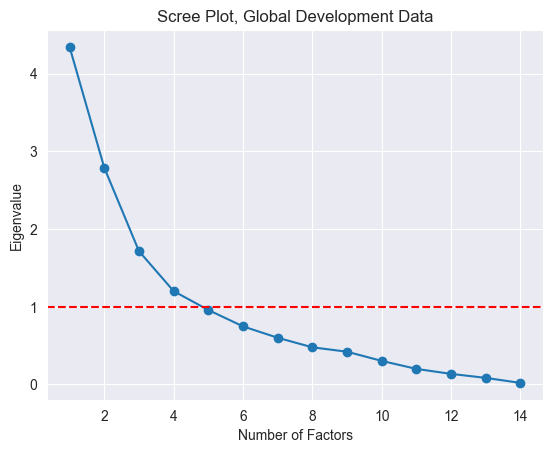

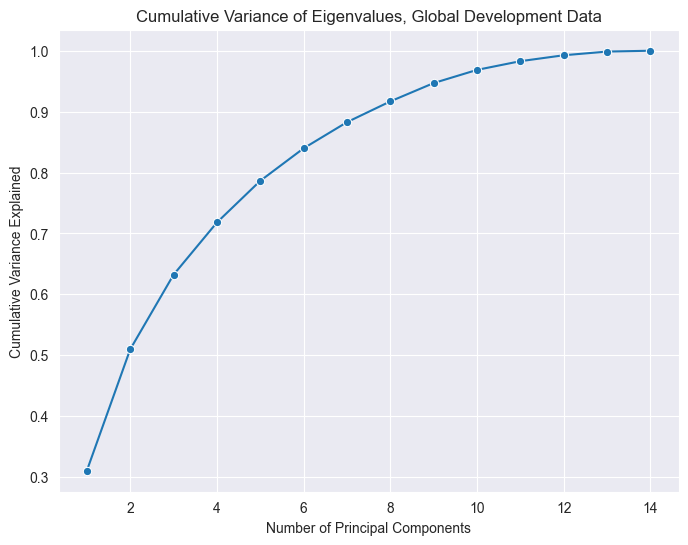

In [359]:
### Creating the factor analysis object
fa = FactorAnalyzer(rotation="oblimin", n_factors=gd_continuous.shape[1])
fa.fit(gd_continuous)

# Getting eigenvalues
gd_eigenvalues = fa.get_eigenvalues()[0]

### Plottibfb scree plot
plt.plot(range(1, len(gd_eigenvalues) + 1), gd_eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot, Global Development Data')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)

# Add line to determine where eigenvalues start to level off
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

### Cumulative variance plot
# Determining the explained variance per eigenvalue, and its cumulative effect.
explained_variance_ratio = gd_eigenvalues / np.sum(gd_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Creating the cumulative variance plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, len(cumulative_variance_ratio) + 1), y=cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance of Eigenvalues, Global Development Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

## 3.1.3 - Factor Analysis Diagram
The factor analysis diagram took much longer then the two-lined code in R, as there was no built-in way to compare factors graphically. I used a base networkx graph (a package for investigating complex network relationships) with the spring_layout, which considers all nodes as repelling objects and the edges (connections) as springs. I attached all factors to a name/node, then added the edges between the factors and their variables, and then between the factors themselves. I used a base weight of 0.3 to determine which variables showed up on the graph. I also seperated the positive and negative edges and colored them accordingly.

After creating the graph, I then went back in afterward and manually adjusted some of the positions, to make the graph more visually appealing.

The coefficients between the factors was done using numpy correlation coefficients. I would be interested in if this is the same as an oblique rotation in R.

The result of this found that factor 1 was strongly associated with socio-enviormental factors (electricity, water, adult literacy, and life expectancy) and weakly associated with GDPPC; that factor 2 had a 1.0 correlation with labor_force, alongside a very strong association with population and a weaker associated with GDP and land_area; that factor 3 was the most diverse, being  associated with wealth metrics, like GDP, air pollution, GDPPC, and land, alongside being connected with alochol consumption; and that factor 4 was the most separate, being only associated with employment, like labor rate and unemployment. Factor 1 and Factor 2 were the only ones with a strong enough association, with better socio-enviormental factors seeming to go alongside less population/land. This may have to do with the outliers that exist with modern countries, with the some of the most populous and large countries - Russia, India, China, and Indonesia - being less "developed" then european countries, who tend to be smaller.

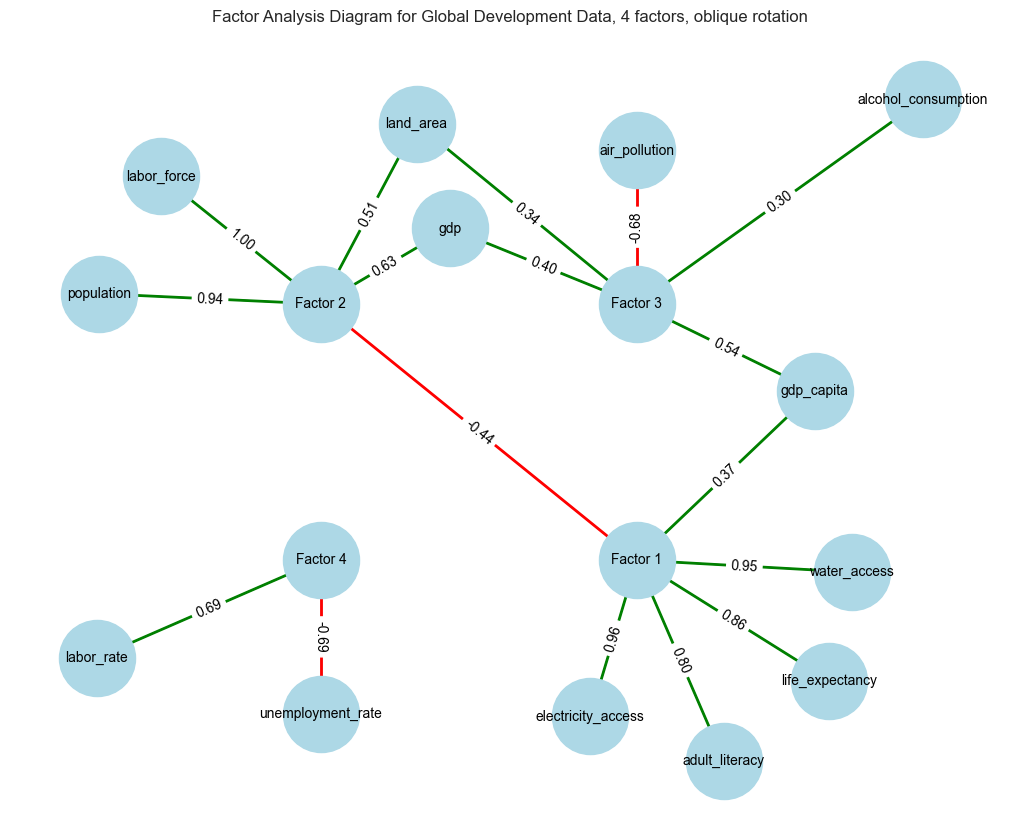

In [360]:
# Initialize FactorAnalyzer object with oblique rotation
gd_fa_4_oblique = FactorAnalyzer(n_factors=4, rotation='oblimin')

# Fit the factor analysis model to DataFrame
gd_fa_4_oblique.fit(gd_continuous)

### Creating Factor Analysis Diagram
# Finding loadings
gd_factor_loadings = gd_fa_4_oblique.loadings_
gd_factor_names = [f"Factor {i+1}" for i in range(gd_fa_4_oblique.n_factors)]

G = nx.Graph()

# Adding nodes for factors
for i, factor_name in enumerate(gd_factor_names):
    G.add_node(factor_name)

# Adding edges between factors based on factor loadings
for i in range(gd_fa_4_oblique.n_factors):
    for j in range(gd_fa_4_oblique.n_factors):
        if i != j:
            weight = np.corrcoef(gd_factor_loadings[:, i], gd_factor_loadings[:, j])[0, 1]
            if abs(weight) > 0.3:  # Weight threshold
                G.add_edge(gd_factor_names[i], gd_factor_names[j], weight=weight)

# Adding nodes for variables and edges between variables and factors
for j, variable in enumerate(gd_continuous.columns):
    for i, factor_name in enumerate(gd_factor_names):
        weight = gd_factor_loadings[j, i]
        if abs(weight) > 0.3:  # Weight threshold
            G.add_node(variable)
            G.add_edge(variable, factor_name, weight=weight)
            
# Defining specific factor positions (had to be manual, else graph splays information with current settings for negative values.) Done after the graph was developed.
gd_factor_positions = {
    gd_factor_names[0]: (5, 0),
    gd_factor_names[1]: (0, 5),
    gd_factor_names[2]: (5, 5),
    gd_factor_names[3]: (0, 0),
    gd_continuous.columns[9]: (5, 8),
    gd_continuous.columns[13]: (0, -3)
}

# Creating separate lists of edges for positive and negative values
positive_edges = [(u, v) for u, v, w in G.edges(data='weight') if w > 0]
negative_edges = [(u, v) for u, v, w in G.edges(data='weight') if w < 0]

# Drawing the graph with different edge colors for positive and negative values
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
pos = nx.spring_layout(G, pos=gd_factor_positions, fixed=gd_factor_positions.keys())
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, node_color='lightblue')

# Drawing positive edges in green and negative edges in red
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', width=2)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', width=2)

# Creating edge labels
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Factor Analysis Diagram for Global Development Data, 4 factors, oblique rotation')
plt.show()


## 3.1.4 - Factor Loadings Heatmap
I decided to rename the factors to Socio-Enviormental Conditions, Population & Land Size, Wealth & Health, and Employment, and put them on the heatmap below to, potentially, better show their relationships - and to show which variables may or may not have barely made the cut, or don't apply at all to one of the factors. Alcohol consumption, for instance, is similarly associated with Socio-Enviormental Conditions and Wealth & Health, while it has no relationship with Population & Land Size. GDPPC also appears to be the most broad/universal descriptor variable, having some level of corelation with three factors but no truly strong explanations for any.

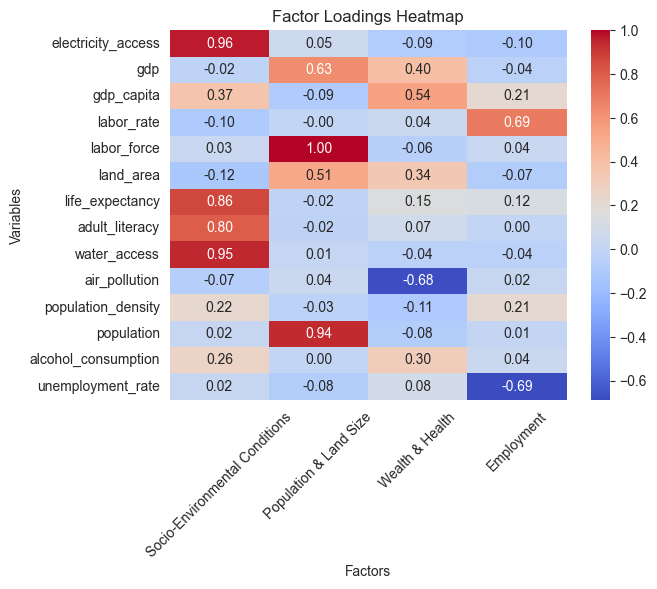

In [361]:
# Factor 1
gd_factor_names[0] = "Socio-Environmental Conditions"

# Factor 2
gd_factor_names[1] = "Population & Land Size"

# Factor 3
gd_factor_names[2] = "Wealth & Health"

# Factor 4
gd_factor_names[3] = "Employment"

# Create the heatmap with variable names
sns.heatmap(gd_factor_loadings, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=gd_continuous.columns, xticklabels=gd_factor_names)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.xticks(rotation=45) # Rotates the x-axis labels to ensure they are readable/do not blend into one another
plt.show()

## 3.1.5 - Graph Analysis
Here, I decided to follow alongside a similar path to my PCA analysis, first taking a basic look at socio-environmental conditions and wealth & health. I originally tried to compared socio-environmental with population & land size, but the outliers hurt the ability to properly visualize the comparison, even with a log graph - showing the dangers that emerge when using data that has outliers. The regression plot found a positive relationship between the socio-enviormental conditions and the wealth & health of the country.

Second, I make a pair plot with a hue around income_class. It found that, while employment and population & land size did not appear to have do not have much of a relationship with income class, wealth & health and socio-environmental conditions have a strong connection, especially with countries considered to be of a "very-high" income.

,Socio-Environmental Conditions,Population & Land Size,Wealth & Health,Employment,country,income_class,continent
0,-0.745609,-0.001255,-0.928023,-1.207788,Afghanistan,Low income,Asia
1,0.701250,-0.334942,-0.263485,-0.661600,Albania,Upper middle income,Europe
2,0.386452,-0.050255,-0.383080,-1.145156,Algeria,Lower middle income,Africa
3,-1.466837,-0.169446,-0.115334,0.552863,Angola,Lower middle income,Africa
4,0.669166,0.030377,0.233080,-0.187286,Argentina,Upper middle income,South America
...,...,...,...,...,...,...,...
181,0.388984,-0.034110,-0.290671,-0.074669,Venezuela,Lower middle income,South America
182,0.406510,0.635191,-0.591995,0.879638,Vietnam,Lower middle income,Asia
183,-1.083522,-0.110927,-0.643116,-1.471822,Yemen,Low income,Asia
184,-1.433918,-0.206590,-0.220973,0.021350,Zambia,Lower middle income,Africa


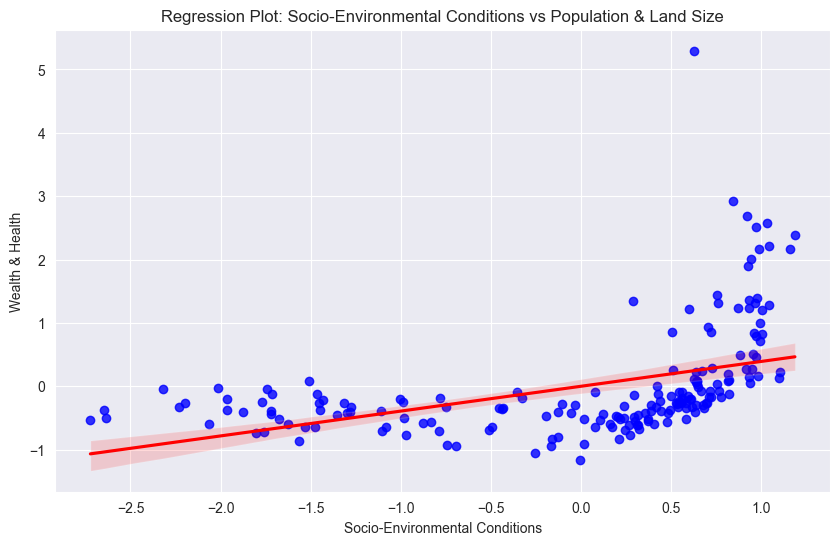

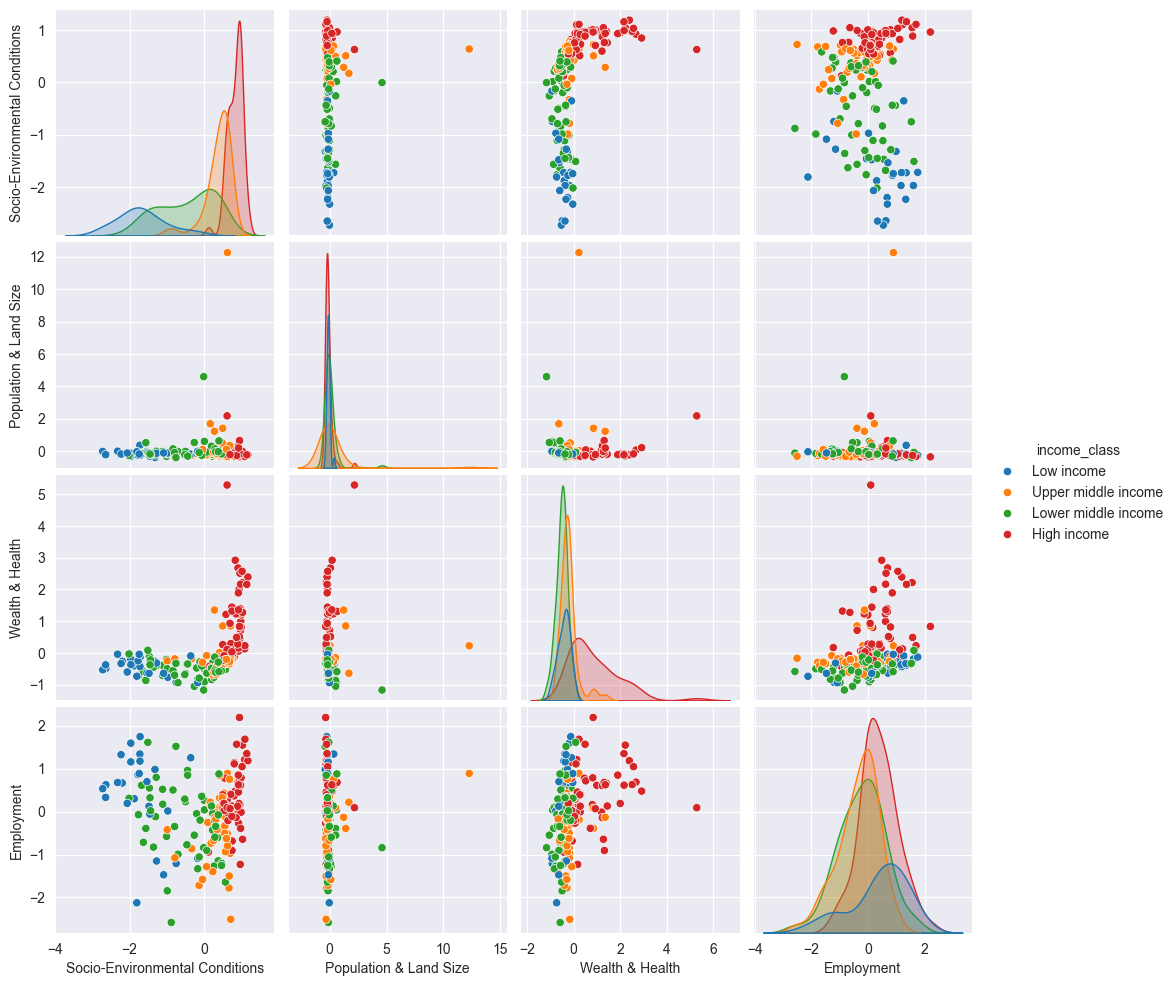

In [362]:
### Plotting
# Getting the factor scores, and then combining with previous string values
gd_factor_scores = gd_fa_4_oblique.transform(gd_continuous)
gd_factors = pd.DataFrame(gd_factor_scores, columns=gd_factor_names)
gd_factors_full = pd.concat([gd_factors, gd_string], axis=1)
display(gd_factors_full)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Socio-Environmental Conditions', y='Wealth & Health', data=gd_factors_full, color='red', scatter_kws={'color': 'blue'})
plt.title('Regression Plot: Socio-Environmental Conditions vs Population & Land Size')
plt.xlabel('Socio-Environmental Conditions')
plt.ylabel('Wealth & Health')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(pd.DataFrame(gd_factors_full), hue="income_class")
plt.show()

# Exercise 3.2 - EFA for Airline Passenger Satisfaction
Many of the steps are similar to what was done in 3.1, so some of the textual explanations will be skipped over.

**Apply EFA for dimension reduction and analysis of latent variables, focusing on the
measurements of the satisfaction level. What can you find? How many factors would be
relevant? Can you interpret and name the factors?**

Shown through 3.2.2 and beyond. I decided that 3 factors were relevant through a scree plot and looking at a factor analysis graph, describing Needs & Comfort, Active Service, and Convenience.

**Visualize the data based on the factors and factor scores. Use also some of the categorical
variables in your graphs. Interpret your analysis.**

Shown in 3.2.3 and beyond. Satisfaction overall appears most dependent on Active Service - with those who rate the active service most highly universally satisfied - while Convenience had the weakest but still existing effect, most likely due to its variables being distributed early in the airline process.

**Again reflect with (some of) the challenges and pitfalls listed in the lecture material.**

This data managed to play more towards the considerations of factor analysis due to the broad distribution of data, similar scales, and lack of outliers. However, subjectivity continues to play a role - the decision for 3 factors was an active decision on my end. The broad spread of data also made certain forms of analysis difficult without adjustment.

In [363]:
### Displaying Airline data
display(airline)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## 3.2.1 - Exploring the data
When checking for NA values, I found that the total number of rows dropped from 129880 to 129487 - a 0.3% loss in information. I decided that this was not worth the removal of a column, was to many variables to go in and manually fix, and that the loss was not significant, and so the rows were simply dropped. I also dropped the columns from the dataframe that were on a different scale from the general questions (i.e. id wont help when relating to the rating on Inflight wifi service).

In [364]:
### NA Adjustments
# Dropping all rows with NA values
airline_no_na = airline.dropna()

# Noting the differences in NA values
print("Differences in NA values for original dataframe:")
print("Number of rows in original DataFrame:", airline.shape[0])
print("Number of rows after dropping NA values:", airline_no_na.shape[0])

# Dropping different scale columns
airline_no_na = airline.drop(columns=["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance", "id", "Age"])

### Changing to continuous
# Adjusting the dataset so that it only has continuous values. Grabs all the indexes that match the selected dtypes from the original dataframe.
airline_continuous = airline_no_na[airline_no_na.select_dtypes(include=["float64", "int64"]).columns].dropna()
airline_string = airline_no_na[airline_no_na.select_dtypes(include=["object"]).columns]

Differences in NA values for original dataframe:
Number of rows in original DataFrame: 129880
Number of rows after dropping NA values: 129487


## 3.2.2 - Scree Plot
The scree plot suggest that 4 factors would be the best descriptor, explaining ~67% of the variance. However, later analysis determined instead to do 3 factors - explaining ~60% of the variance - would be the best way forward, due to the 4th factor lacking an independent identity. It shows how scree plots are useful for isolating how to approach the data, but should not be taken as a universal determinant.

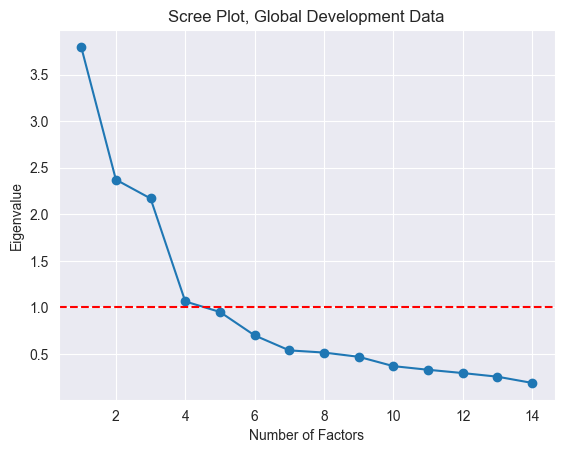

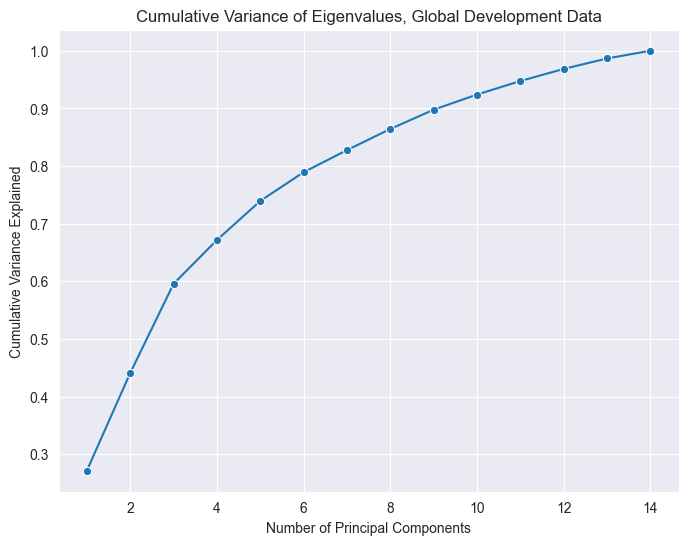

In [365]:
### Creating the factor analysis object
fa = FactorAnalyzer(rotation="oblimin", n_factors=airline_continuous.shape[1])
fa.fit(airline_continuous)

# Getting eigenvalues
airline_eigenvalues = fa.get_eigenvalues()[0]

### Plottibfb scree plot
plt.plot(range(1, len(airline_eigenvalues) + 1), airline_eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot, Global Development Data')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)

# Add line to determine where eigenvalues start to level off
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

### Cumulative variance plot
# Determining the explained variance per eigenvalue, and its cumulative effect.
explained_variance_ratio = airline_eigenvalues / np.sum(airline_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Creating the cumulative variance plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, len(cumulative_variance_ratio) + 1), y=cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance of Eigenvalues, Global Development Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

## 3.2.3 - 4 Factor Analysis Diagram
Here, I have the original 4 factor analysis diagram. The 4th factor is only associated with online boarding, and lightly associated with the gate location, which is an interesting result. However, this does not feel like it has a clear enough identity away from the other 3 factors, and I therefore decided to reduce it to 3 factors.

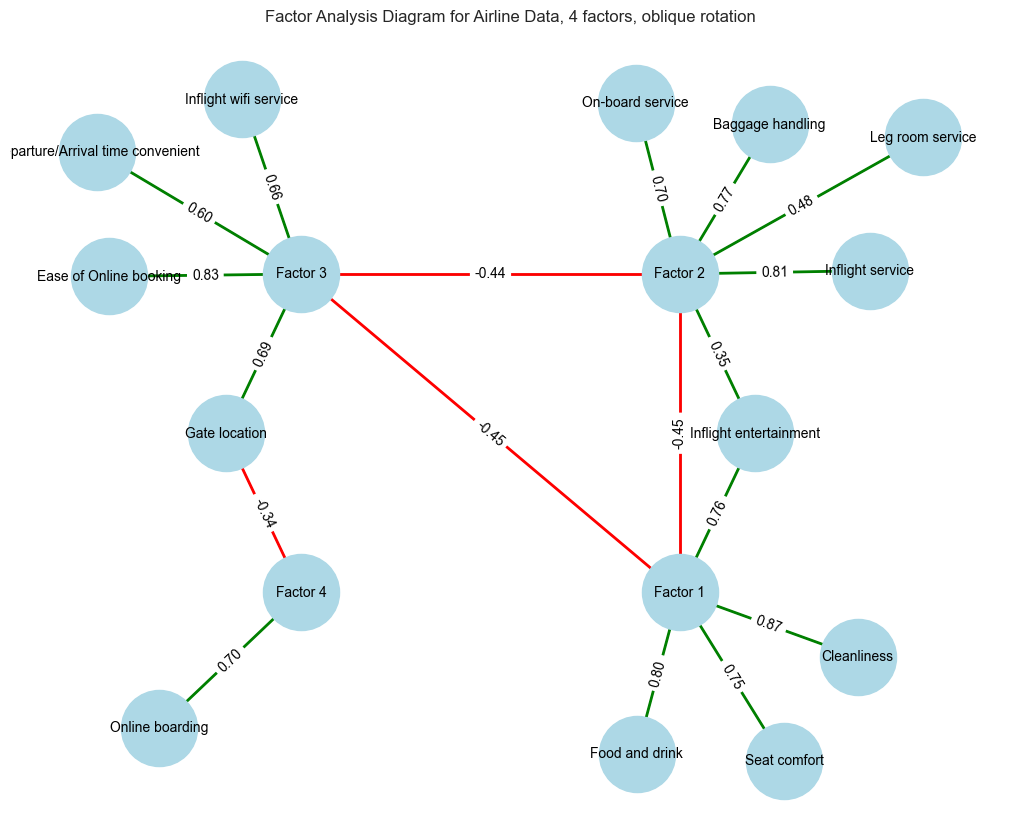

In [366]:
# Initialize FactorAnalyzer object with oblique rotation
airline_fa_4_oblique = FactorAnalyzer(n_factors=4, rotation='oblimin')

# Fit the factor analysis model to DataFrame
airline_fa_4_oblique.fit(airline_continuous)

### Creating Factor Analysis Diagram
# Finding loadings
airline_factor_loadings = airline_fa_4_oblique.loadings_
airline_factor_names = [f"Factor {i+1}" for i in range(airline_fa_4_oblique.n_factors)]

G = nx.Graph()

# Adding nodes for factors
for i, factor_name in enumerate(airline_factor_names):
    G.add_node(factor_name)

# Adding edges between factors based on factor loadings
for i in range(airline_fa_4_oblique.n_factors):
    for j in range(airline_fa_4_oblique.n_factors):
        if i != j:
            weight = np.corrcoef(airline_factor_loadings[:, i], airline_factor_loadings[:, j])[0, 1]
            if abs(weight) > 0.3:  # Weight threshold
                G.add_edge(airline_factor_names[i], airline_factor_names[j], weight=weight)

# Adding nodes for variables and edges between variables and factors
for j, variable in enumerate(airline_continuous.columns):
    for i, factor_name in enumerate(airline_factor_names):
        weight = airline_factor_loadings[j, i]
        if abs(weight) > 0.3:  # Weight threshold
            G.add_node(variable)
            G.add_edge(variable, factor_name, weight=weight)
            
# Defining specific factor positions (had to be manual, else graph splays information with current settings for negative values.) Done after the graph was developed.
airline_factor_positions = {
    airline_factor_names[0]: (5, 0),
    airline_factor_names[1]: (5, 5),
    airline_factor_names[2]: (0, 5),
    airline_factor_names[3]: (0, 0),
    airline_continuous.columns[3]: (-1, 2.5),
    airline_continuous.columns[7]: (6, 2.5)
}

# Creating separate lists of edges for positive and negative values
positive_edges = [(u, v) for u, v, w in G.edges(data='weight') if w > 0]
negative_edges = [(u, v) for u, v, w in G.edges(data='weight') if w < 0]

# Drawing the graph with different edge colors for positive and negative values
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
pos = nx.spring_layout(G, pos=airline_factor_positions, fixed=airline_factor_positions.keys())
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, node_color='lightblue')

# Drawing positive edges in green and negative edges in red
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', width=2)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', width=2)

# Creating edge labels
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Factor Analysis Diagram for Airline Data, 4 factors, oblique rotation')
plt.show()


## 3.2.4 - 3 Factor Analysis Diagram
I would pair the now three factors below with the following identifiers - for factor 1, Needs & Comfort; for factor 2, Active Service; for factor 3, Convenience. Interestingly, all of these seem to have a negative relationship with one another on first glance, when my first assumption would be that they would have a positive effect (this, however, is proven to be a mistake when looking at the graphs below).

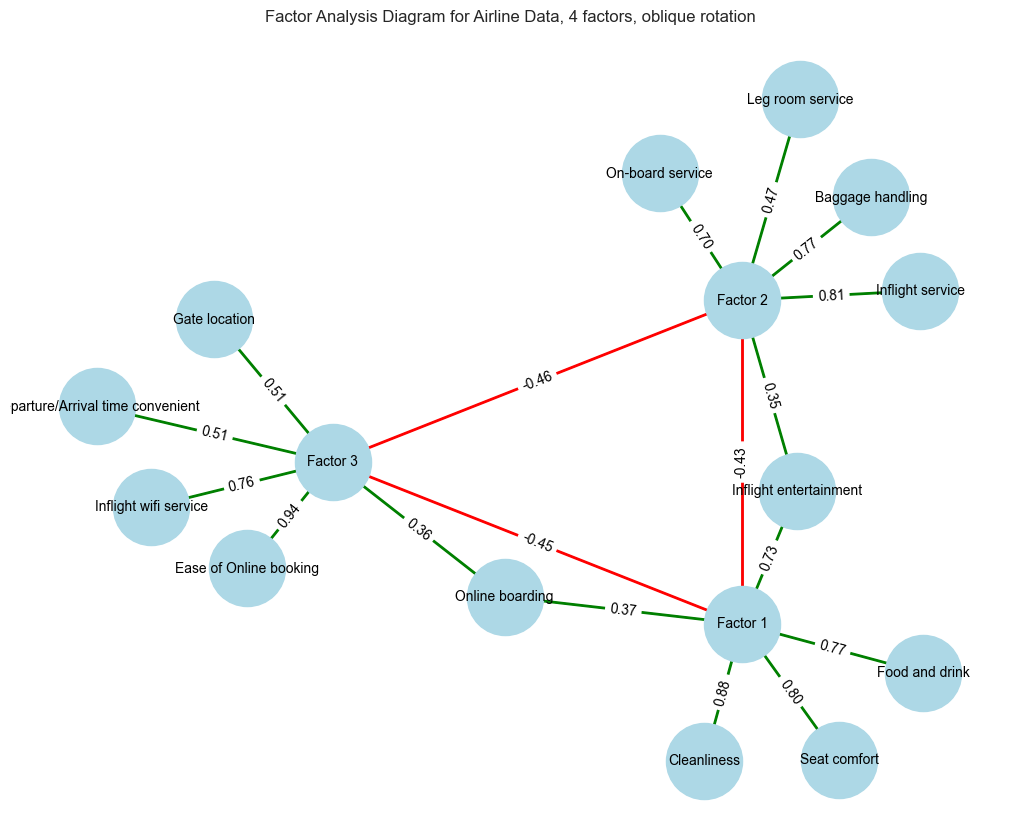

In [367]:
# Initialize FactorAnalyzer object with oblique rotation
airline_fa_3_oblique = FactorAnalyzer(n_factors=3, rotation='oblimin')

# Fit the factor analysis model to DataFrame
airline_fa_3_oblique.fit(airline_continuous)

### Creating Factor Analysis Diagram
# Finding loadings
airline_factor_loadings = airline_fa_3_oblique.loadings_
airline_factor_names = [f"Factor {i+1}" for i in range(airline_fa_3_oblique.n_factors)]

G = nx.Graph()

# Adding nodes for factors
for i, factor_name in enumerate(airline_factor_names):
    G.add_node(factor_name)

# Adding edges between factors based on factor loadings
for i in range(airline_fa_3_oblique.n_factors):
    for j in range(airline_fa_3_oblique.n_factors):
        if i != j:
            weight = np.corrcoef(airline_factor_loadings[:, i], airline_factor_loadings[:, j])[0, 1]
            if abs(weight) > 0.3:  # Weight threshold
                G.add_edge(airline_factor_names[i], airline_factor_names[j], weight=weight)

# Adding nodes for variables and edges between variables and factors
for j, variable in enumerate(airline_continuous.columns):
    for i, factor_name in enumerate(airline_factor_names):
        weight = airline_factor_loadings[j, i]
        if abs(weight) > 0.3:  # Weight threshold
            G.add_node(variable)
            G.add_edge(variable, factor_name, weight=weight)
            
# Defining specific factor positions (had to be manual, else graph splays information with current settings for negative values.) Done after the graph was developed.
airline_factor_positions = {
    airline_factor_names[0]: (5, 0),
    airline_factor_names[1]: (5, 5),
    airline_factor_names[2]: (0, 2.5),
    # airline_factor_names[3]: (0, 0),
    # airline_continuous.columns[3]: (-2, 2.5),
    # airline_continuous.columns[7]: (2.5, 2.5)
}

# Creating separate lists of edges for positive and negative values
positive_edges = [(u, v) for u, v, w in G.edges(data='weight') if w > 0]
negative_edges = [(u, v) for u, v, w in G.edges(data='weight') if w < 0]

# Drawing the graph with different edge colors for positive and negative values
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
pos = nx.spring_layout(G, pos=airline_factor_positions, fixed=airline_factor_positions.keys())
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, node_color='lightblue')

# Drawing positive edges in green and negative edges in red
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', width=2)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', width=2)

# Creating edge labels
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Factor Analysis Diagram for Airline Data, 4 factors, oblique rotation')
plt.show()


## 3.2.5 - Factor Loadings Heatmap
Unlike for the global development, there appears to generally be a clearer separation between the factors and their related variables, aside from online boarding, inflight entertainment, and checkin service (which was not a strong enough relationship with any factor to apply, but was strongest with Active Service, which is another positive mark towards its name). Ease of online bookings very strong correlation with Factor 3/Convince may imply that either initial impressions directly affect how the individual perceives the airline, or that airlines who don't have good online booking systems are generally poor at general convenience.

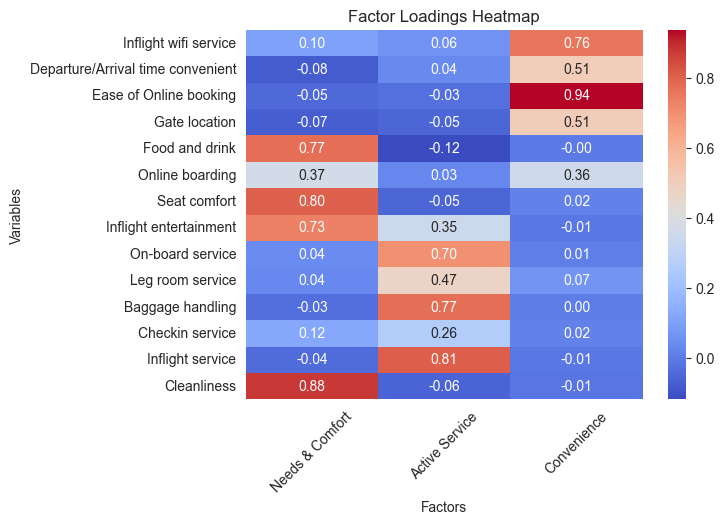

In [368]:
# Factor 1
airline_factor_names[0] = "Needs & Comfort"

# Factor 2
airline_factor_names[1] = "Active Service"

# Factor 3
airline_factor_names[2] = "Convenience"

# Create the heatmap with variable names
sns.heatmap(airline_factor_loadings, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=airline_continuous.columns, xticklabels=airline_factor_names)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.xticks(rotation=45) # Rotates the x-axis labels to ensure they are readable/do not blend into one another
plt.show()

## 3.2.6 - Plot Analysis
The regression plot I did between needs & comfort and active service was to better determine if my coefficients above were correct. It appears that they may be being calculated/displayed in the wrong direction, and that the relationship is a positive one - where increasing opinion in one area aligns with an increasing opinion in other areas.

When looking at satisfaction, the pair plot fails to provide much analysis when relating the factors, though does show that there is broadly distributed areas. However, we can see that satisfaction appears to have the strongest relationship with active service from the airlines, and a decent relationship with needs & comfort, and an existing but more minor relationship with convenience. That convenience factor may again have to do with its effects being distributed early in the process, so it has a harder time describing how passengers feel after the actual flight.

,Needs & Comfort,Active Service,Convenience,Gender,Customer Type,Type of Travel,Class,satisfaction
0,1.354025,0.710158,0.218659,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,-1.926832,-0.586318,-0.060273,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,1.439458,0.418638,-0.572192,Female,Loyal Customer,Business travel,Business,satisfied
3,-1.287999,-0.432689,1.123784,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,0.298948,-0.224570,0.182848,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...,...,...,...
129875,0.559260,0.405486,0.123707,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
129876,0.535179,1.093161,0.989677,Male,Loyal Customer,Business travel,Business,satisfied
129877,-1.221265,0.249674,-0.780450,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
129878,0.533985,0.652053,0.198168,Male,Loyal Customer,Business travel,Business,satisfied


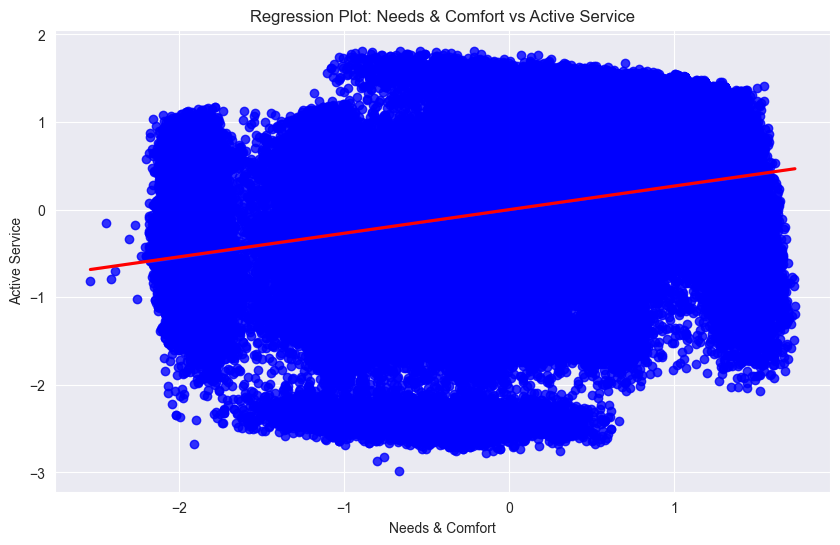

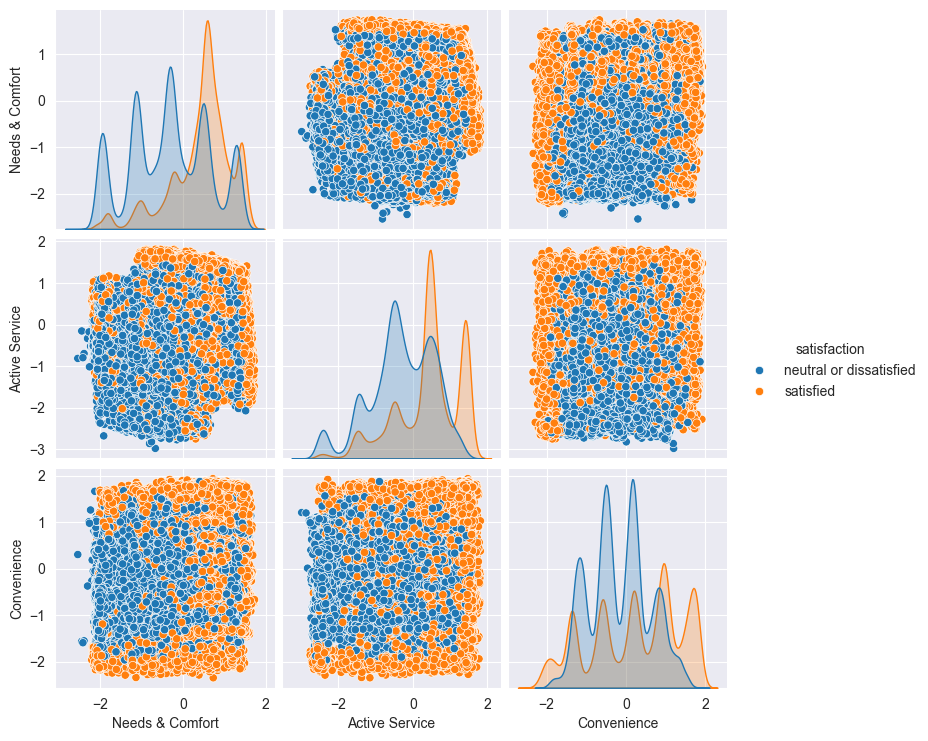

In [369]:
### Plotting
# Getting the factor scores, and then combining with previous string values
airline_factor_scores = airline_fa_3_oblique.transform(airline_continuous)
airline_factors = pd.DataFrame(airline_factor_scores, columns=airline_factor_names)
airline_factors_full = pd.concat([airline_factors, airline_string], axis=1)
display(airline_factors_full)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Needs & Comfort', y='Active Service', data=airline_factors_full, color='red', scatter_kws={'color': 'blue'})
plt.title('Regression Plot: Needs & Comfort vs Active Service')
plt.xlabel('Needs & Comfort')
plt.ylabel('Active Service')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(pd.DataFrame(airline_factors_full), hue="satisfaction")
plt.show()

# 3.3 DECA Data
I decided to make a three factor analysis, using the same variables, to see how it compared with the example given in the supplementary materials.

The result found a different factor result then the example given - while factor 2 remained largely the same, and factor 1 with the example factor 3 with similarities in shot_put and discus, there was differences, like factor 1 being associated negatively with the 1500m and 400m, and factor 3 having a 1:1 relationship with long_jumping over the 1:1 relationship that the example gives with the 1500m. I wonder whether the error comes from the data, or the mathematical workings of the package and selected rotation?

In [370]:
# Dropping points, height, and weight columns from deca, and preforming NA dropping again
deca_adj = DECA.drop(["Points", "Height", "Weight"], axis=1)
deca_adj_no_na = deca_adj.dropna()

# Getting continuous variables
deca_continuous = deca_adj_no_na[deca_adj_no_na.select_dtypes(include=["float64", "int64"]).columns].dropna()
deca_string = deca_adj_no_na[deca_adj_no_na.select_dtypes(include=["object"]).columns]

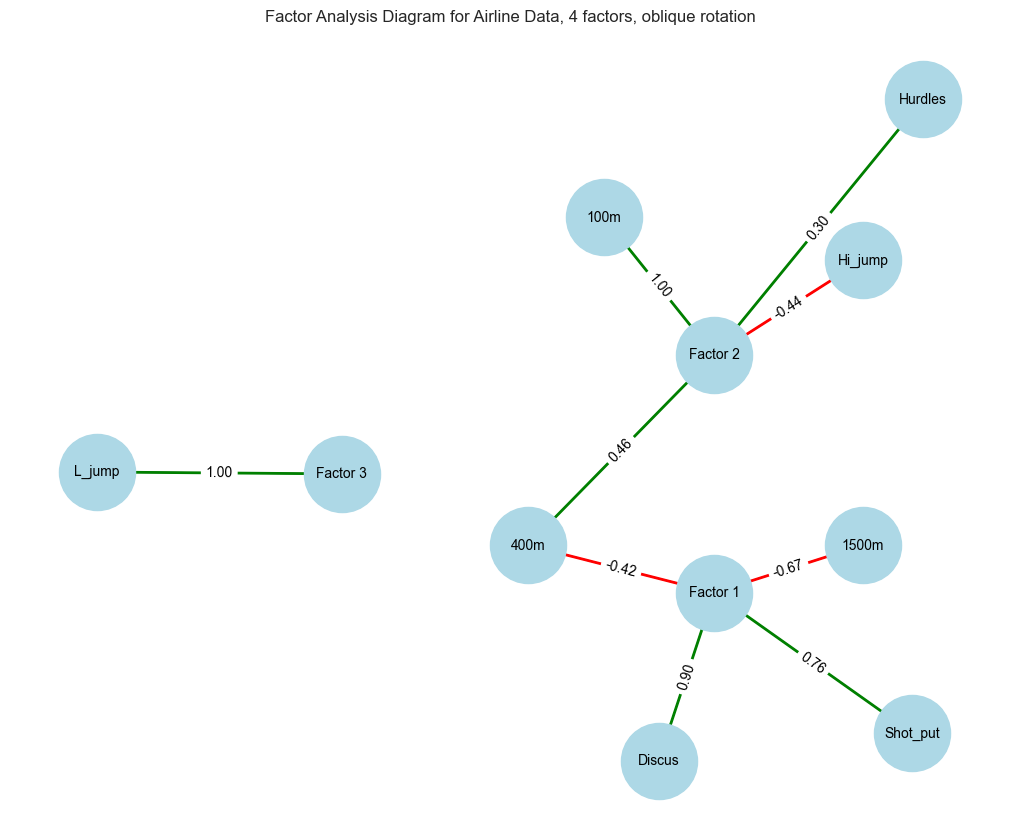

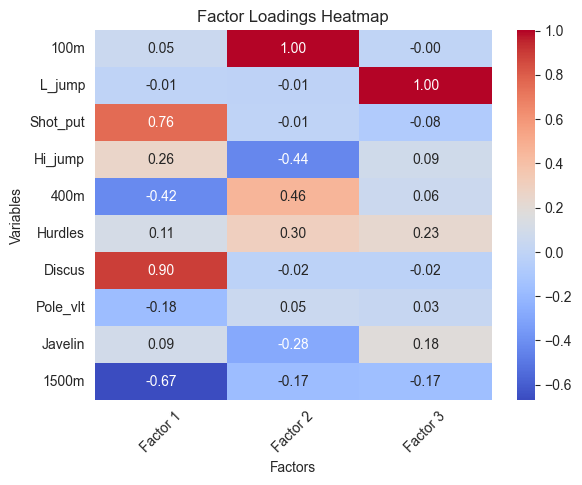

In [372]:
# Initialize FactorAnalyzer object with oblique rotation
deca_fa_3_oblique = FactorAnalyzer(n_factors=3, rotation='oblimin')

# Fit the factor analysis model to DataFrame
deca_fa_3_oblique.fit(deca_continuous)

### Creating Factor Analysis Diagram
# Finding loadings
deca_factor_loadings = deca_fa_3_oblique.loadings_
deca_factor_names = [f"Factor {i+1}" for i in range(deca_fa_3_oblique.n_factors)]

G = nx.Graph()

# Adding nodes for factors
for i, factor_name in enumerate(deca_factor_names):
    G.add_node(factor_name)

# Adding edges between factors based on factor loadings
for i in range(deca_fa_3_oblique.n_factors):
    for j in range(deca_fa_3_oblique.n_factors):
        if i != j:
            weight = np.corrcoef(deca_factor_loadings[:, i], deca_factor_loadings[:, j])[0, 1]
            if abs(weight) > 0.3:  # Weight threshold
                G.add_edge(deca_factor_names[i], deca_factor_names[j], weight=weight)

# Adding nodes for variables and edges between variables and factors
for j, variable in enumerate(deca_continuous.columns):
    for i, factor_name in enumerate(deca_factor_names):
        weight = deca_factor_loadings[j, i]
        if abs(weight) > 0.3:  # Weight threshold
            G.add_node(variable)
            G.add_edge(variable, factor_name, weight=weight)
            
# Defining specific factor positions (had to be manual, else graph splays information with current settings for negative values.) Done after the graph was developed.
deca_factor_positions = {
    deca_factor_names[0]: (5, 0),
    deca_factor_names[1]: (5, 5),
    deca_factor_names[2]: (0, 2.5),
    deca_continuous.columns[-1]: (7, 1),
    deca_continuous.columns[3]: (7, 7),
    deca_continuous.columns[4]: (2.5, 1)
}

# Creating separate lists of edges for positive and negative values
positive_edges = [(u, v) for u, v, w in G.edges(data='weight') if w > 0]
negative_edges = [(u, v) for u, v, w in G.edges(data='weight') if w < 0]

# Drawing the graph with different edge colors for positive and negative values
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
pos = nx.spring_layout(G, pos=deca_factor_positions, fixed=deca_factor_positions.keys())
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, node_color='lightblue')

# Drawing positive edges in green and negative edges in red
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', width=2)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', width=2)

# Creating edge labels
edge_labels = {(u, v): f"{w:.2f}" for u, v, w in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Factor Analysis Diagram for Airline Data, 4 factors, oblique rotation')
plt.show()

# Create the heatmap with variable names
sns.heatmap(deca_factor_loadings, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=deca_continuous.columns, xticklabels=deca_factor_names)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.xticks(rotation=45) # Rotates the x-axis labels to ensure they are readable/do not blend into one another
plt.show()